In [1]:
import os
import sys

import numpy as np

import torch
import pytorch3d
from pytorch3d.io import load_obj, save_obj, load_objs_as_meshes
from pytorch3d.structures import Meshes, Pointclouds
from pytorch3d.ops import sample_points_from_meshes, knn_points, estimate_pointcloud_normals, knn_gather, cubify

import trimesh


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import pyvista as pv
pv.start_xvfb()
pv.set_jupyter_backend('html')

import torch
import pytorch3d 
from pytorch3d.ops import knn_points,knn_gather
# # from pytorch3d.structures import Meshes

# from .utils import one_hot_sparse


In [2]:
from ops.mesh_geometry import *

In [3]:
device = torch.device("cuda:0")
mesh_trg = load_objs_as_meshes(["kitty.obj"], device=device)

bbox = mesh_trg.get_bounding_boxes()
center = (bbox[:, :, 0] + bbox[:, :, 1]) / 2
size = (bbox[:, :, 1] - bbox[:, :, 0]) 
rescalar = 1.3
scale = 2.0 / (torch.max(size)*rescalar+1e-8)

mesh_trg = mesh_trg.update_padded((mesh_trg.verts_padded()-center)*scale+center)

/home/yihao/anaconda3/envs/geometery3d/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:544: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


In [4]:

voxelizer = Differentiable_Voxelizer(bbox_density=128)
voxel_trg = voxelizer.forward(mesh_trg, output_resolution=128)


cubified = cubify(voxel_trg, 0.5)

/home/yihao/anaconda3/envs/geometery3d/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343997789/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


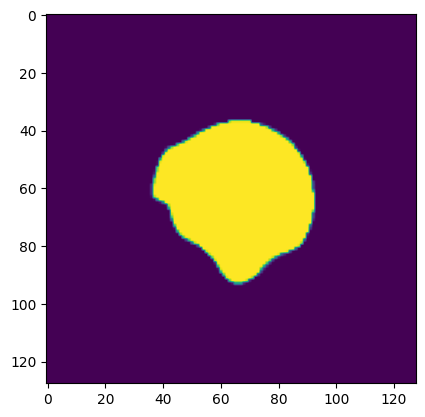

In [5]:
plt.imshow(voxel_trg[0,50].detach().cpu().numpy())

In [6]:
pl = pv.Plotter(notebook=True)
trimesh_cubified = trimesh.Trimesh(cubified[0].verts_packed().detach().cpu().numpy(), cubified[0].faces_packed().detach().cpu().numpy())
trimesh_cubified = pv.wrap(trimesh_cubified)
pl.add_mesh(trimesh_cubified, color='lightblue', style='wireframe')

trimesh_trg = trimesh.Trimesh(mesh_trg[0].verts_packed().detach().cpu().numpy(), mesh_trg[0].faces_packed().detach().cpu().numpy())
trimesh_trg = pv.wrap(trimesh_trg)
pl.add_mesh(trimesh_trg, color='lightgreen', opacity=0.3)

pl.show()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…